In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [63]:
def plot_co2_data(file_path, age_range=(55000, 0), pCO2_range=(0, 1000), y_axis_type='linear', with_error_bars=True):
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    df['age_Ma']= df['age'] / 1000
# Creating a colormap for 'proxy' categories
    unique_proxies = df['proxy'].unique()
    colors = plt.cm.get_cmap('tab10', len(unique_proxies))
    color_map = dict(zip(unique_proxies, colors.colors))

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    for proxy in unique_proxies:
        proxy_df = df[df['proxy'] == proxy]
        if with_error_bars:
            ax.errorbar(proxy_df['age_Ma'], proxy_df['co2'], 
                        yerr=[proxy_df['co2'] - proxy_df['co2_uncertainty_lower'], 
                              proxy_df['co2']+proxy_df['co2_uncertainty_higher']],
                        fmt='o', ecolor='gray', alpha=0.5, color=color_map[proxy], label=proxy)
        else:
            ax.scatter(proxy_df['age_Ma'], proxy_df['co2'], color=color_map[proxy], label=proxy)


    # Setting y-axis scale
    if y_axis_type == 'log':
        ax.set_yscale('log')

    # # Adding a legend for 'proxy'
    # proxies = df['proxy'].unique()
    # for proxy in proxies:
    #     ax.scatter([], [], c=proxy, label=proxy)
    # ax.legend(title='Proxy')

    ax.legend(title='Proxy')
    ax.set_xlim(age_range)
    ax.set_ylim(pCO2_range)
    
    ax.set_xlabel('Age')
    ax.set_ylabel('CO2 Concentration')

    plt.show()

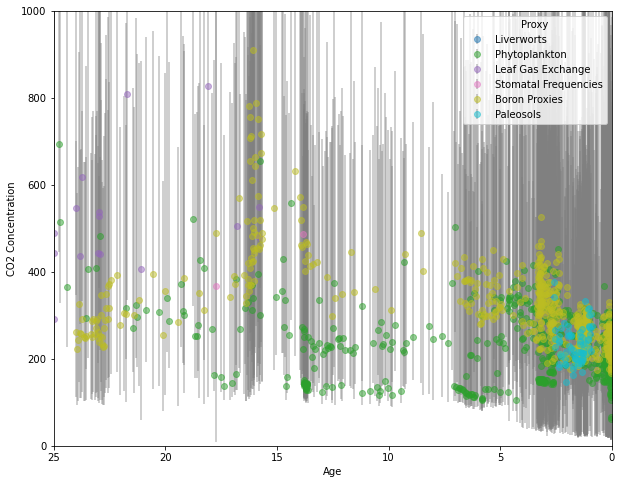

In [64]:
plot_co2_data('age_co2_plot_data.xlsx',age_range=(25, 0))

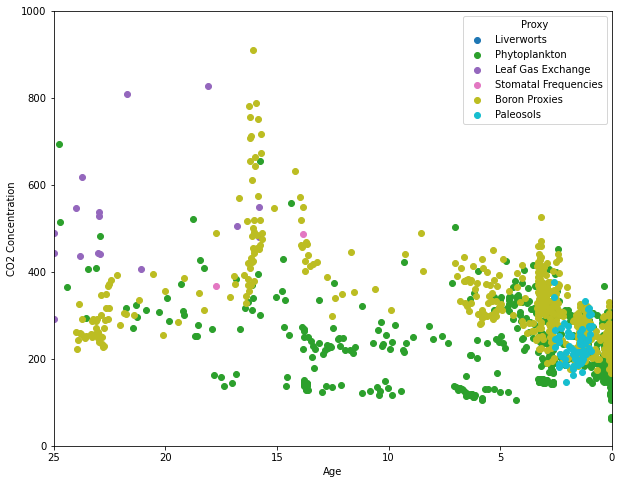

In [67]:
plot_co2_data('age_co2_plot_data.xlsx',age_range=(25, 0),with_error_bars=False, pCO2_range=(0, 1000))

In [43]:
df['co2'][0] - df['co2_uncertainty_lower'][0]

509.0

In [48]:
df['co2'][0] + df['co2_uncertainty_higher'][0]  

1405.0

In [49]:
df['co2'][0]

813.0